## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [206]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [616]:
from scipy.stats import uniform as randFloat
from scipy.stats import randint as randInt
    
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix, accuracy_score, classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [520]:
#get the dataset into dataframe
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Data Preprocessing:
To understand the data and explore all the rows and columns thoroughly to perform data analysis.

In [450]:
#checking the rows and columns
df.shape

(18249, 14)

In [17]:
#checking for information of independent variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [15]:
#checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

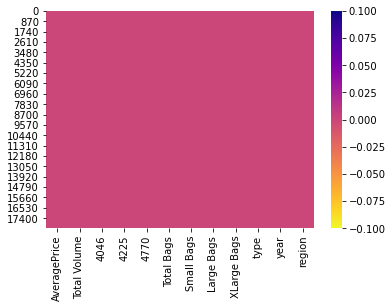

In [64]:
#missing values can be visualized using graphs
sns.heatmap(df.isnull(),cmap='plasma_r')

In [521]:
#There is one index column which is appearing twice, hence removing it
# We are having Year column, hence date can be unnecessary to keep
df.drop(columns=['Unnamed: 0','Date'],inplace=True)

In [27]:
#data statistics, how well the data is spread, and check if any outliers present
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [396]:
#checking for unique categorical values
print(df['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


In [44]:
#checking for unique categorical values
print(df['region'].value_counts())

Orlando                338
Chicago                338
StLouis                338
Louisville             338
Seattle                338
West                   338
California             338
HartfordSpringfield    338
RichmondNorfolk        338
Syracuse               338
SouthCarolina          338
Midsouth               338
Indianapolis           338
SanDiego               338
HarrisburgScranton     338
NewOrleansMobile       338
Houston                338
SanFrancisco           338
PhoenixTucson          338
Atlanta                338
NorthernNewEngland     338
Roanoke                338
CincinnatiDayton       338
Denver                 338
BaltimoreWashington    338
Detroit                338
NewYork                338
Boston                 338
DallasFtWorth          338
Columbus               338
RaleighGreensboro      338
Boise                  338
GrandRapids            338
TotalUS                338
Sacramento             338
Spokane                338
MiamiFtLauderdale      338
S

In [55]:
#fetching all column names
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

## Exploratory Data Analysis

Visualizing the relationship of all attributes present in table using different graphs

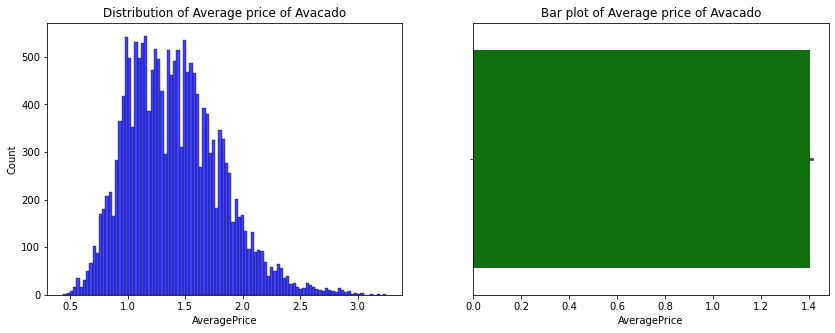

In [104]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(df['AveragePrice'],color='Blue',bins=100)
plt.title('Distribution of Average price of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(df['AveragePrice'],color='g')
plt.title('Bar plot of Average price of Avacado')

plt.show()

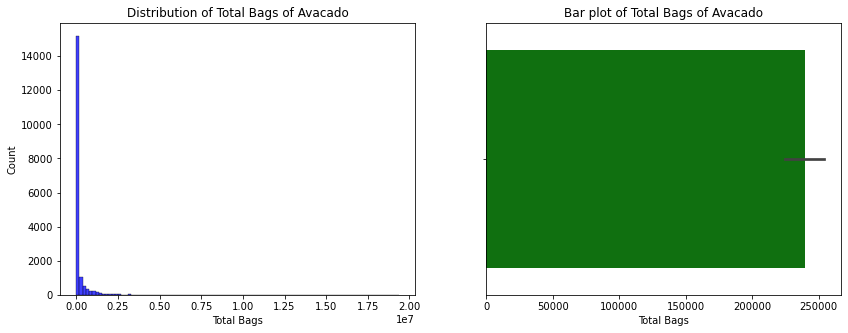

In [105]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(df['Total Bags'],color='Blue',bins=100)
plt.title('Distribution of Total Bags of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(df['Total Bags'],color='g')
plt.title('Bar plot of Total Bags of Avacado')

plt.show()

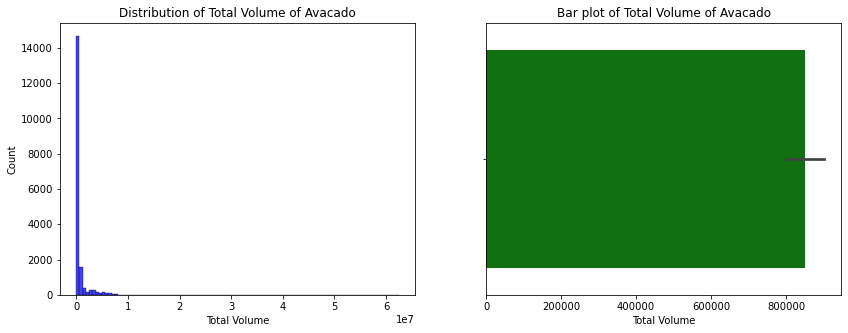

In [106]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(df['Total Volume'],color='Blue',bins=100)
plt.title('Distribution of Total Volume of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(df['Total Volume'],color='g')
plt.title('Bar plot of Total Volume of Avacado')

plt.show()

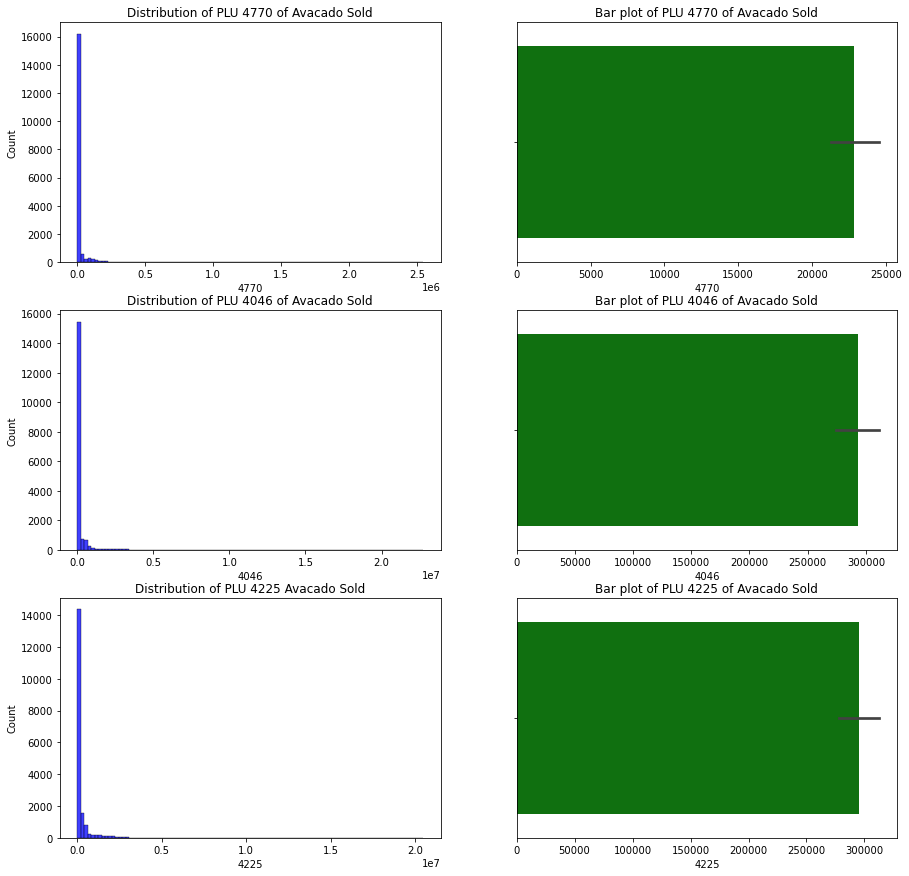

In [103]:
plt.figure(figsize=(15,15), facecolor='white')
ax=plt.subplot(3,2,1)
sns.histplot(df['4770'],color='Blue',bins=100)
plt.title('Distribution of PLU 4770 of Avacado Sold')
 
ax=plt.subplot(3,2,2)
sns.barplot(df['4770'],color='g')
plt.title('Bar plot of PLU 4770 of Avacado Sold')

ax=plt.subplot(3,2,3)
sns.histplot(df['4046'],color='Blue',bins=100)
plt.title('Distribution of PLU 4046 of Avacado Sold')
 
ax=plt.subplot(3,2,4)
sns.barplot(df['4046'],color='g')
plt.title('Bar plot of PLU 4046 of Avacado Sold')

ax=plt.subplot(3,2,5)
sns.histplot(df['4225'],color='Blue',bins=100)
plt.title('Distribution of PLU 4225 Avacado Sold')
 
ax=plt.subplot(3,2,6)
sns.barplot(df['4225'],color='g')
plt.title('Bar plot of PLU 4225 of Avacado Sold')

plt.show()

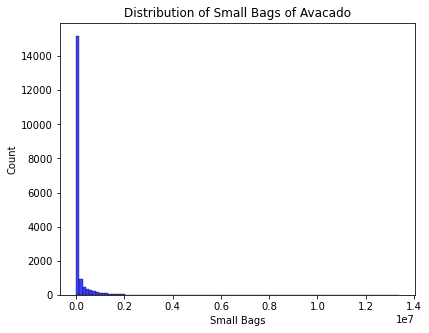

In [114]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(df['Small Bags'],color='Blue',bins=100)
plt.title('Distribution of Small Bags of Avacado')
 
    
ax=plt.subplot(1,2,2)
sns.barplot(df['Total Volume'],color='g')
plt.title('Bar plot of Small Bags of Avacado')

plt.show()

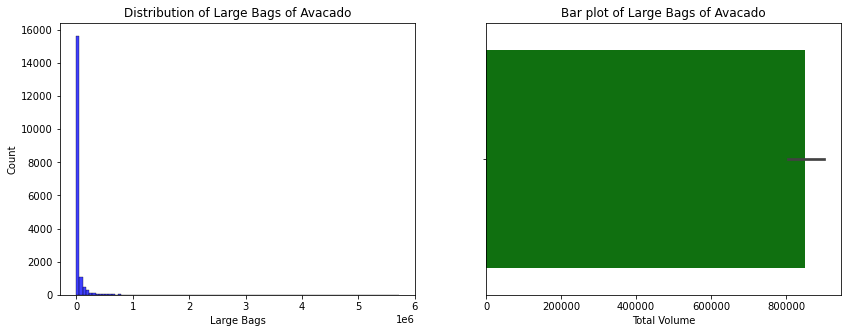

In [116]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(df['Large Bags'],color='Blue',bins=100)
plt.title('Distribution of Large Bags of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(df['Total Volume'],color='g')
plt.title('Bar plot of Large Bags of Avacado')

plt.show()

## Observations:
1. There is lot of skewness present in 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' need to be handled
2. Outliers need to be confirmed and to be proceeded with removal of outliers       

### Bivariate Analysis

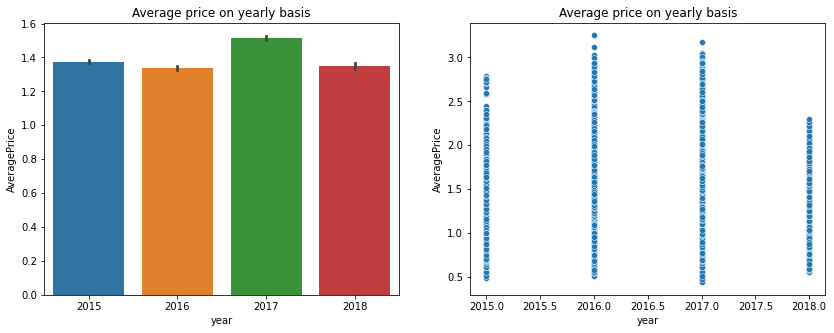

In [122]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['AveragePrice'])
plt.title('Average price on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=df['year'],y=df['AveragePrice'])
plt.title('Average price on yearly basis')

plt.show()

The average price of Avacado has been ranging nearly equal and in 2017 it has been the highest

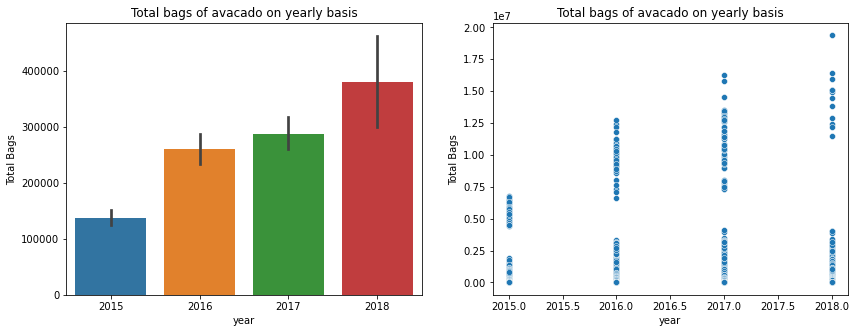

In [121]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['Total Bags'])
plt.title('Total bags of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=df['year'],y=df['Total Bags'])
plt.title('Total bags of avacado on yearly basis')

plt.show()

The total bags of avacados has increased by nearly 10% every year and the average of total bags sold is highest in 2018

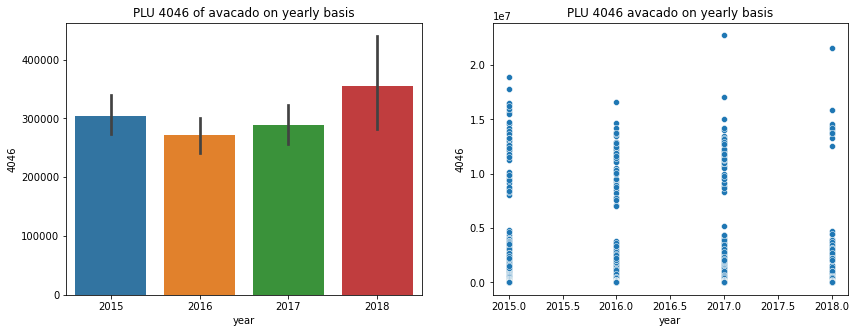

In [125]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['4046'])
plt.title('PLU 4046 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=df['year'],y=df['4046'])
plt.title('PLU 4046 avacado on yearly basis')

plt.show()

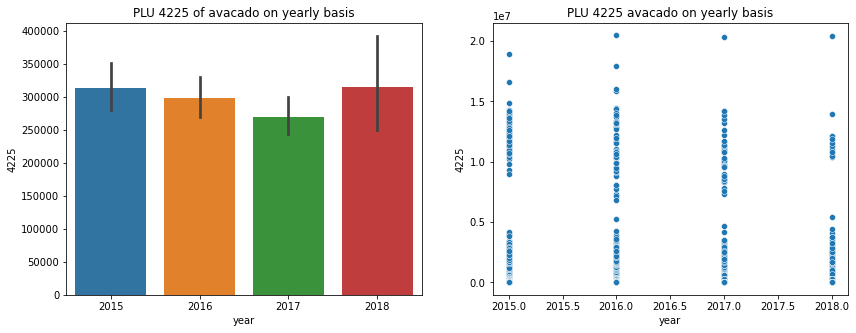

In [126]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['4225'])
plt.title('PLU 4225 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=df['year'],y=df['4225'])
plt.title('PLU 4225 avacado on yearly basis')

plt.show()

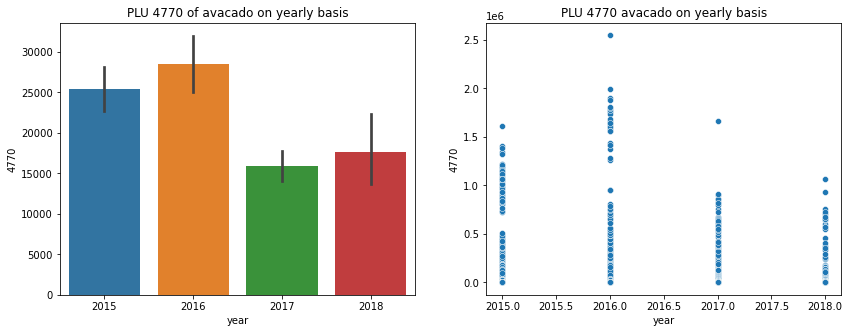

In [127]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['4770'])
plt.title('PLU 4770 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=df['year'],y=df['4770'])
plt.title('PLU 4770 avacado on yearly basis')

plt.show()

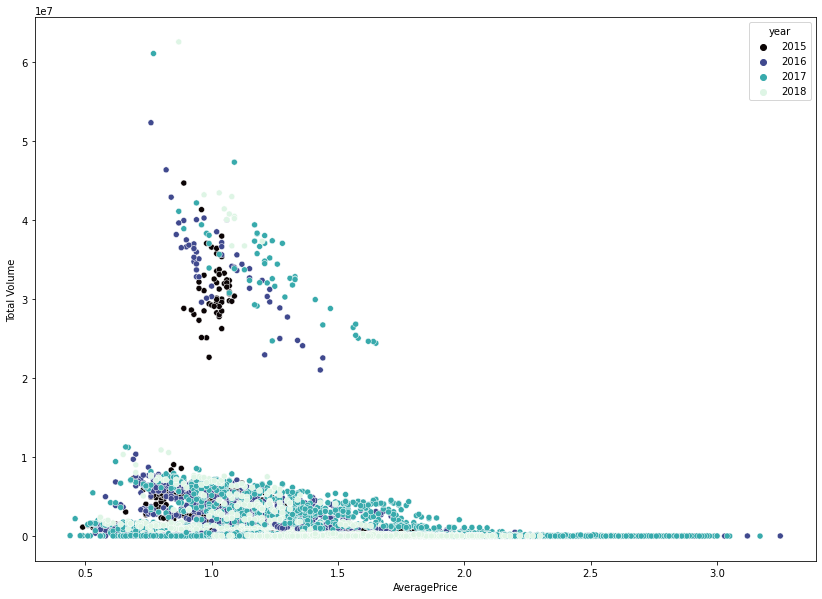

In [142]:
plt.figure(figsize=(14,10), facecolor='white')
sns.scatterplot(x=df['AveragePrice'],y=df['Total Volume'], hue=df['year'], palette='mako')

plt.show()

We can see there is no much relation between average price and total volume sold on yearly basis. We can conclude that total volume sold was high in 2017.

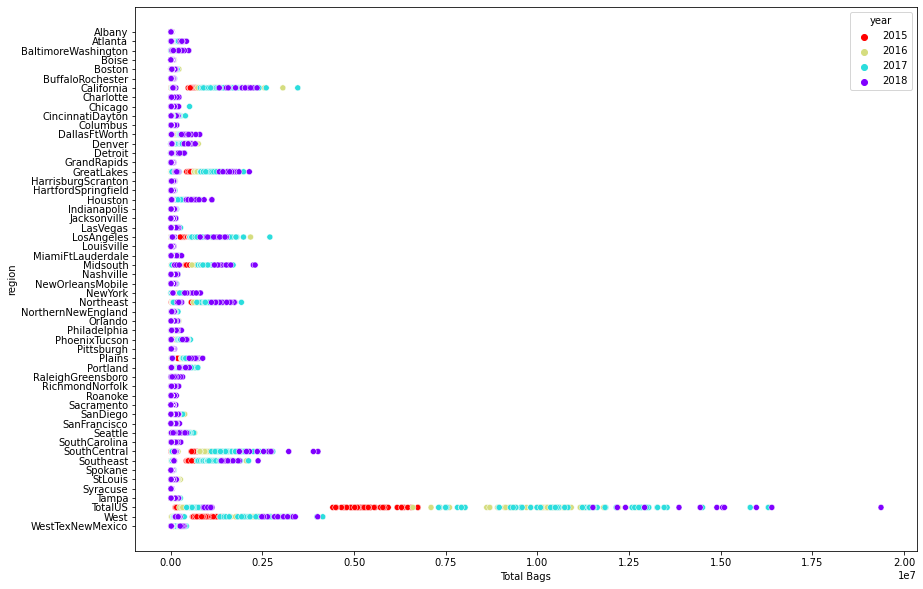

In [166]:
plt.figure(figsize=(14,10), facecolor='white')
sns.scatterplot(x=df['Total Bags'],y=df['region'], hue=df['year'], palette='rainbow_r')

plt.show()

Buffalo Rocher is the highest avacado consuming region, preceded by South central and West

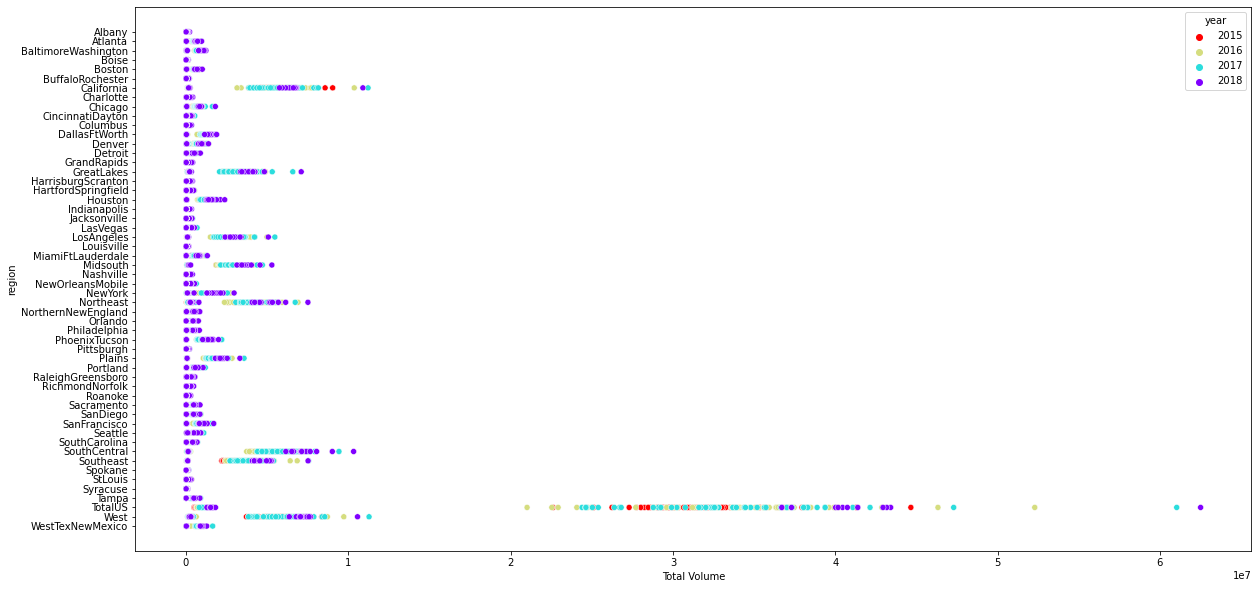

In [168]:
plt.figure(figsize=(20,10), facecolor='white')
sns.scatterplot(x=df['Total Volume'],y=df['region'], hue=df['year'], palette='rainbow_r')

plt.show()

<Figure size 1080x720 with 0 Axes>

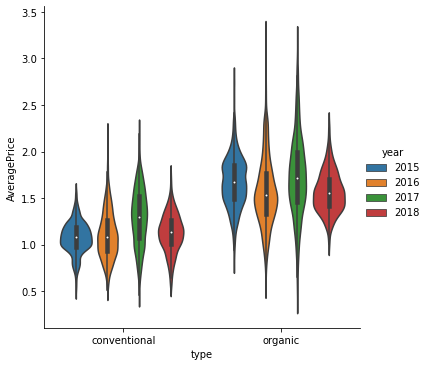

In [182]:
plt.figure(figsize=(15,10), facecolor='white')
sns.catplot(x='type',y='AveragePrice', data=df,hue='year', kind='violin')

plt.show()

The prices of organic avacados been more then that of conventionally available avacados

<Figure size 1080x720 with 0 Axes>

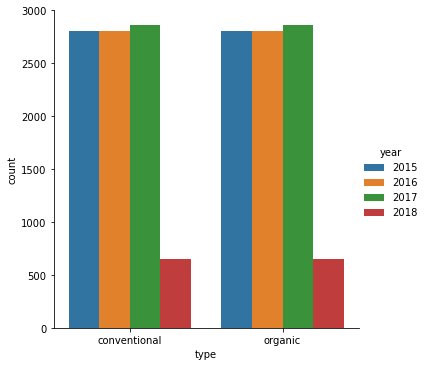

In [190]:
plt.figure(figsize=(15,10), facecolor='white')
sns.catplot(x='type', data=df,hue='year', kind='count')

plt.show()

Nearly same amount of conventional avacados were consumed each year

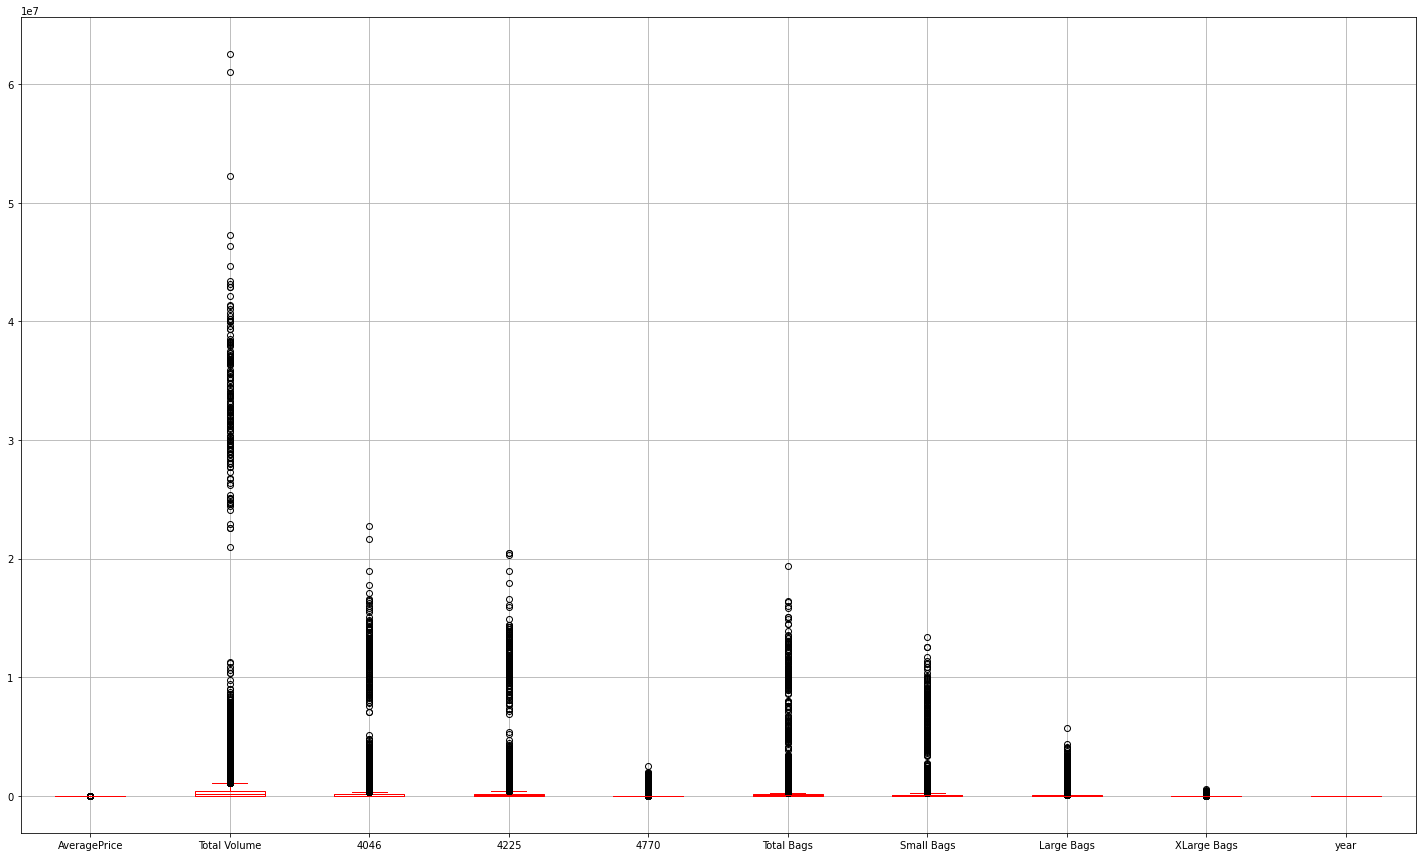

In [253]:
df.boxplot(figsize=(25,15),color='r')
plt.subplots_adjust()
plt.show()

Outliers in Total Volume, 4046,4225,4770, Total Bags, Small Bags, Large Bags

<Figure size 1080x720 with 0 Axes>

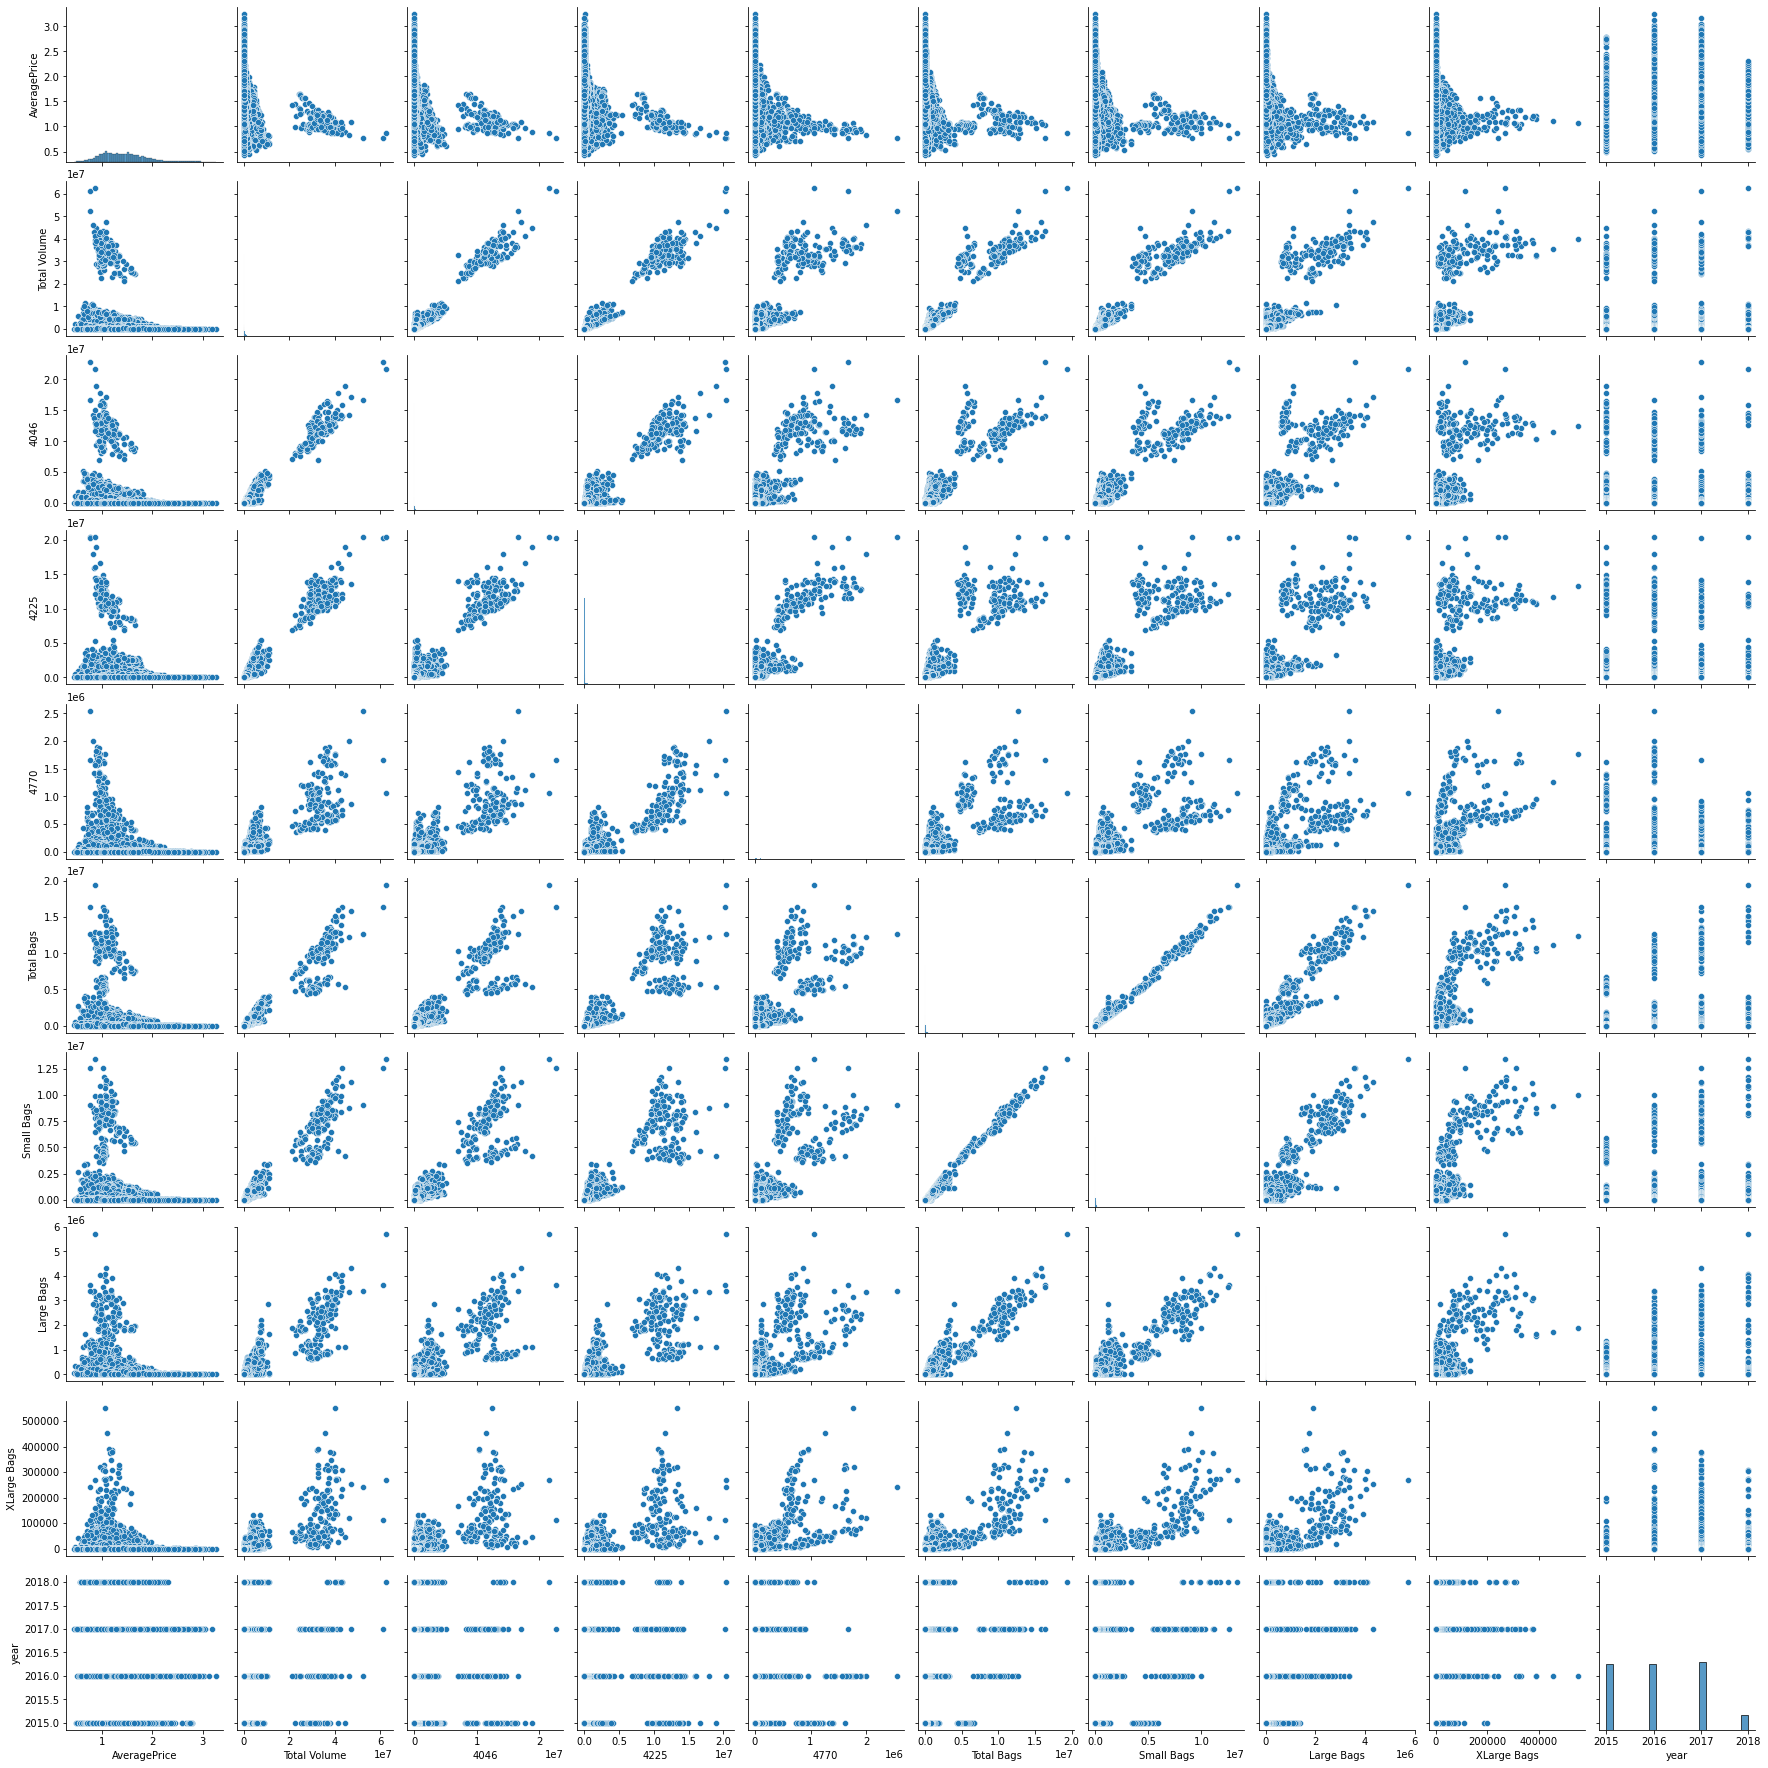

In [254]:
plt.figure(figsize=(15,10), facecolor='white')
sns.pairplot(df,palette='pink_r')
plt.show()

In [522]:
#checking the correlation of each attribute with target variable
corr = df.corrwith(df['AveragePrice'])

In [453]:
corr

AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
year            0.093197
dtype: float64

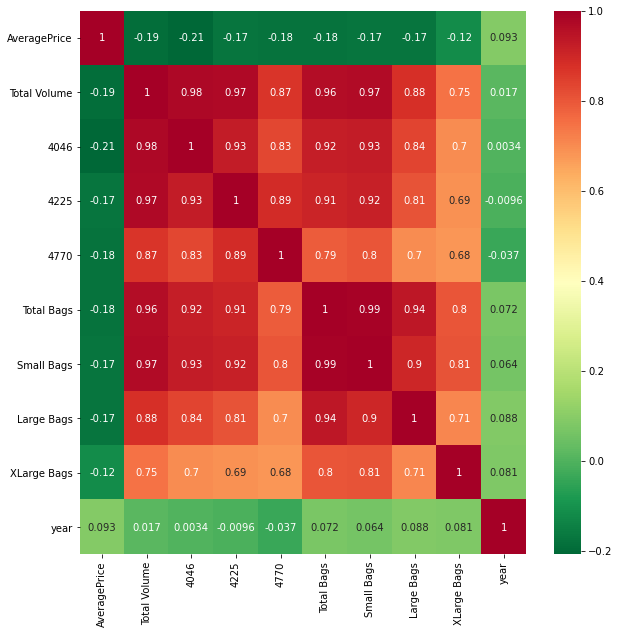

In [381]:
#checking correlation of each attributes with other
corr1 = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr1,cmap='RdYlGn_r', annot=True)
plt.show()

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


### Converting categorical variables into numerical types using different Encoding techniques

In [523]:
df['type'] = pd.get_dummies(df['type'],)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  uint8  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(1), uint8(1)
memory usage: 1.5+ MB


In [524]:
le = LabelEncoder()
df1=le.fit_transform(df['region'])
df['region']=pd.Series(df1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  uint8  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(1), uint8(1)
memory usage: 1.5 MB


In [456]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

The following attributes have outliers: 'Total Volume', '4046','4225','4770', 'Total Bags', 'Small Bags', 'Large Bags',which affects the model accuracy hence need to be treated. Let us treat Outliers

### Outlier Detection

In [528]:
from scipy.stats import zscore
z_score = zscore(df[[ 'Total Volume', '4046','4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
abs_sc = np.abs(z_score)
len(df['Total Volume']),len(df['4046']),len(df['4225']),len(df['4770']),len(df['Total Bags']),len(df['Small Bags']),len(df['Large Bags']),len(df['XLarge Bags'])


(18249, 18249, 18249, 18249, 18249, 18249, 18249, 18249)

In [529]:
filtr = (abs_sc<1.5).all(axis=1)
df = df[filtr]

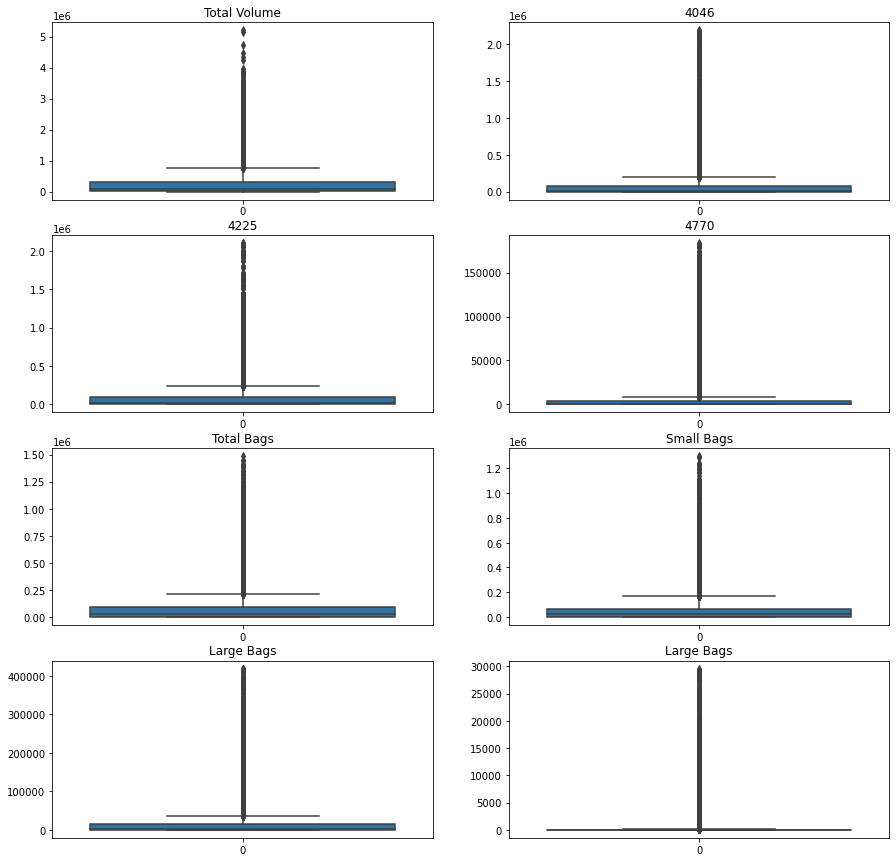

In [530]:
#checking the outliers
plt.figure(figsize=(15,15), facecolor='white')
ax=plt.subplot(4,2,1)
sns.boxplot(data=df['Total Volume'])
plt.title('Total Volume')

ax=plt.subplot(4,2,2)
sns.boxplot(data=df['4046'])
plt.title('4046')

ax=plt.subplot(4,2,3)
sns.boxplot(data=df['4225'])
plt.title('4225')

ax=plt.subplot(4,2,4)
sns.boxplot(data=df['4770'])
plt.title('4770')

ax=plt.subplot(4,2,5)
sns.boxplot(data=df['Total Bags'])
plt.title('Total Bags')

ax=plt.subplot(4,2,6)
sns.boxplot(data=df['Small Bags'])
plt.title('Small Bags')

ax=plt.subplot(4,2,7)
sns.boxplot(data=df['Large Bags'])
plt.title('Large Bags')

ax=plt.subplot(4,2,8)
sns.boxplot(data=df['XLarge Bags'])
plt.title('Large Bags')

plt.show()

In [531]:
#checking the skewness
df.skew()

AveragePrice    0.534857
Total Volume    3.507023
4046            4.705398
4225            4.135020
4770            5.004418
Total Bags      4.000261
Small Bags      4.392946
Large Bags      4.249524
XLarge Bags     5.881472
type            0.147431
year            0.218985
region          0.004383
dtype: float64

Performing Power transformation technique to remove skewness present in data

In [532]:
pwr_tfr = PowerTransformer(method='yeo-johnson', standardize=True)
col=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]
df[col]= pwr_tfr.fit_transform(df[col])

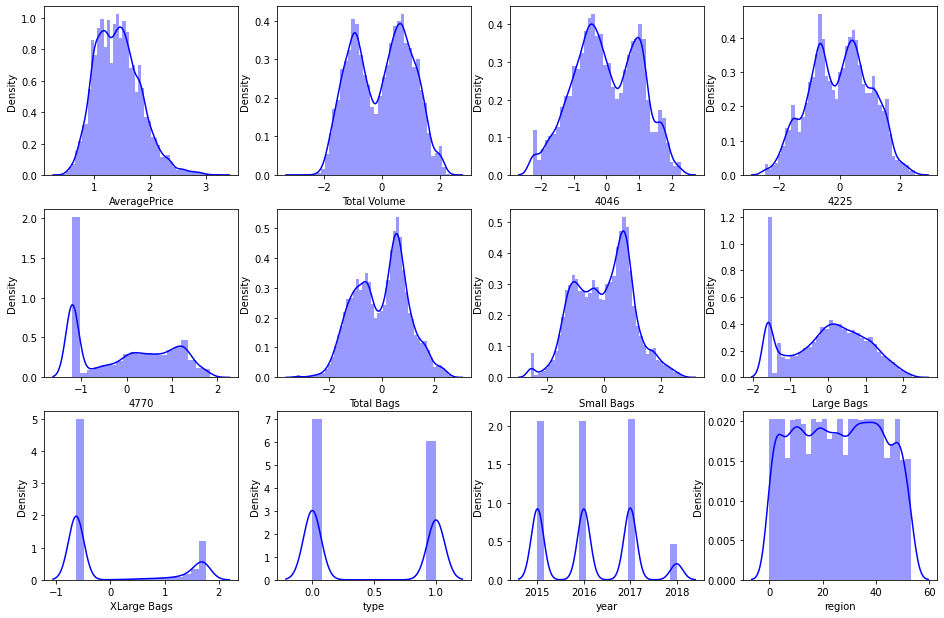

In [533]:
pltnum=1 
plt.figure(figsize=(16,18))
for col in df:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.distplot(df[col],color='blue')
        pltnum+=1
    
plt.show()

## Model Building
### A) Regression Models


In [537]:
#splitting independent features and Target variables, also taking the results from VIF: removing highly correlated variables
X=df.drop(columns=['Small Bags', 'Large Bags','XLarge Bags', 'AveragePrice'],axis=1)
y=df['AveragePrice']

In [540]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

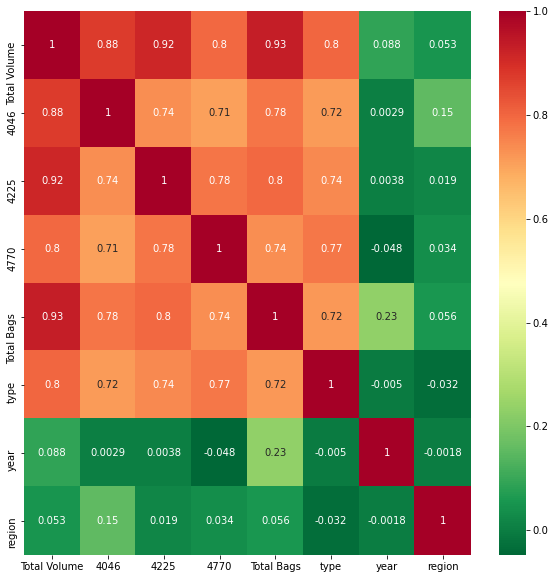

In [542]:
corr1 = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr1,cmap='RdYlGn_r', annot=True)
plt.show()

In [563]:
#Selecting best random state
max_acc = 0
max_RS = 0
i=1
for i in range(2, 200):
    models= [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=i)
    for j in models:
        j.fit(X_train,y_train)
    predict = j.predict(X_test)
    acc = r2_score(y_test, predict)
    if acc>max_acc:
        max_acc = acc
        max_RS=i
        model = j
        i+=1
print('Max accuracy:',max_acc,'for',model ,'model and random state of', max_RS)


Max accuracy: 0.8401402461549059 for KNeighborsRegressor() model and random state of 18


In [571]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=18)

### 1. Linear Model

In [572]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(lm,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.48028299705134336
The mean Abs error: 0.22500831917397568
The mean squared error: 0.22500831917397568
The RMS error: 0.4743504181235384
[-0.04136956  0.14124419  0.35718699  0.10290462  0.12304174]
The cross validation score of model: 0.13660159589647886
*****************************


### Lasso Regularization

In [576]:
lass = Lasso()
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(lass,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: -4.026002880297419e-05
The mean Abs error: 0.3242026683131863
The mean squared error: 0.3242026683131863
The RMS error: 0.5693879769657824
[-3.91749984 -0.77619977 -0.14083289 -0.30396367 -0.70912428]
The cross validation score of model: -1.169524090756252
*****************************


### Ridge Regularization

In [577]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(ridge,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.4803065006814087
The mean Abs error: 0.22499837602047876
The mean squared error: 0.22499837602047876
The RMS error: 0.4743399371974478
[-0.04175831  0.14132082  0.35704363  0.10313828  0.12295476]
The cross validation score of model: 0.13653983570607525
*****************************


### 2. Random Forest

In [581]:
random_for = RandomForestRegressor()
random_for.fit(X_train, y_train)
y_pred = random_for.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(random_for,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.8363195112704833
The mean Abs error: 0.11445205963122793
The mean squared error: 0.11445205963122793
The RMS error: 0.3383076405155933
[ 0.03486873  0.33381168  0.48498174  0.32424455 -0.11583211]
The cross validation score of model: 0.21241491715077604
*****************************


### 3. KNeighbors Algorithm

In [579]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(random_for,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.8401402461549059
The mean Abs error: 0.1100082385249117
The mean squared error: 0.1100082385249117
The RMS error: 0.3316748988466141
[ 0.0269762   0.3507568   0.47677775  0.31091355 -0.12165478]
The cross validation score of model: 0.20875390211319952
*****************************


### 4. Gradient Boosting

In [580]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(gb_reg,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.6638069261747738
The mean Abs error: 0.17371151166476903
The mean squared error: 0.17371151166476903
The RMS error: 0.4167871299173824
[0.22057574 0.34230264 0.52498018 0.2696981  0.17311044]
The cross validation score of model: 0.306133418373432
*****************************


### 5. Decision Tree

In [583]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)


print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(dec_reg,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.6670369669074774
The mean Abs error: 0.15441349548842684
The mean squared error: 0.15441349548842684
The RMS error: 0.3929548262694159
[-0.76215041 -0.36627079 -0.21961846 -0.19143578 -0.78954087]
The cross validation score of model: -0.46580326276437756
*****************************


### Hyperparameter Optimization
We got high cv score for Gradient Boosting. Let us apply hyperparameter Optimazation techniques to improve accuracy for this model.

In [593]:
#applying RandomsearchCV to improve accuracy
#hyperparameter 
n_estimator = [int(x) for x in np.linspace(start=10, stop=120,num=10)]

#number of features to be considered at each split
max_features = ['auto','sqrt']

#max number of tree
max_depth=[int(x) for x in np.linspace(5,50,num=6)]

#minimum number of samples for split
min_samples_split = [2,5,3,7,8,4]

#min number of samples for leaf split
min_samples_leaf = [1,3,2,5,7,8,4,12,15,17,9,20]

param = {'n_estimators':n_estimator, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

In [595]:
ran_search = RandomizedSearchCV(estimator=gb_reg, param_distributions=params, n_iter=15, n_jobs=2, verbose=2)
ran_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=15, n_jobs=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021A0CD9E760>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021A37D0BBE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021A409F7E50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021A4B849B20>},
                   verbose=2)

In [598]:
y_pred = ran_search.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))


***********RESULTS***********
The r2score: 0.8318322357804919
The mean Abs error: 0.12049843481408559
The mean squared error: 0.12049843481408559
The RMS error: 0.3471288446875102


### Saving the best regressor model

In [602]:
import pickle

file= open('Avacado_reg.pkl','wb')

In [603]:
pickle.dump(ran_search,file)

### B) Classification Models

In [604]:
#splitting independent features and Target variables, also taking the results from VIF: removing highly correlated variables
X=df.drop(columns=['Small Bags', 'Large Bags','XLarge Bags', 'region'],axis=1)
y=df['region']

In [605]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

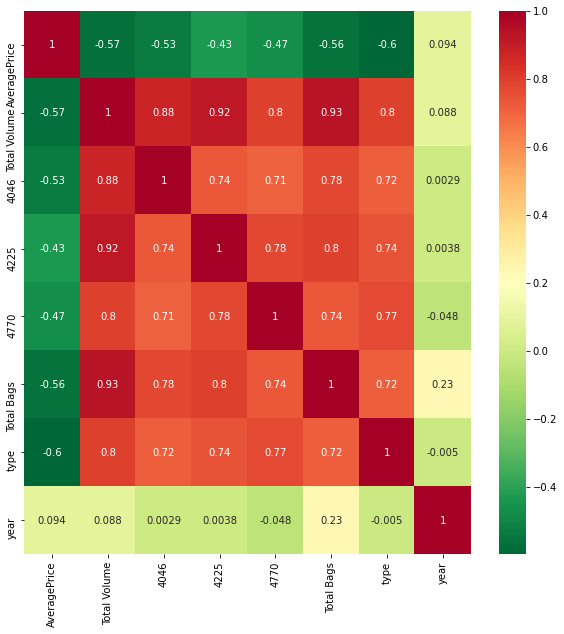

In [606]:
corr1 = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr1,cmap='RdYlGn_r', annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=50)

### 1. Logistic Regression

In [617]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.4464495880737544

 The CV score of Model : 0.4426970856219846

 The confusion Matrix :
  [[40  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  1]
 [ 0  0 73 ...  0  0  4]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  1 51  0]
 [ 0 16  2 ...  0  0 12]]

 The classification report:
                precision    recall  f1-score   support

           0       0.54      0.42      0.47        95
           1       0.22      0.31      0.26        97
           2       0.62      0.62      0.62       118
           3       0.48      0.49      0.49        96
           4       0.58      0.46      0.52       108
           5       0.53      0.63      0.57        92
           6       0.69      0.84      0.76        51
           7       0.45      0.61      0.52        96
           8       0.70      0.81      0.75        96
           9       0.38      0.54      0.45       100
          10       0.48      0.29      0.36       1

### 2. XGBoost Classifier

In [619]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(xgb,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

[09:15:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******************RESULTS******************

 The accuracy score of Model : 0.8250294233032561
[09:16:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:16:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:16:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was 

### 3. Decision Tree

In [620]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(dtc,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7385249117300903

 The CV score of Model : 0.7284116592089955

 The confusion Matrix :
  [[79  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  1]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  5  2 ...  0  0 62]]

 The classification report:
                precision    recall  f1-score   support

           0       0.76      0.83      0.79        95
           1       0.53      0.65      0.59        97
           2       0.90      0.81      0.85       118
           3       0.75      0.79      0.77        96
           4       0.82      0.82      0.82       108
           5       0.67      0.71      0.69        92
           6       0.98      0.92      0.95        51
           7       0.78      0.83      0.81        96
           8       0.90      0.92      0.91        96
           9       0.74      0.67      0.70       100
          10       0.72      0.64      0.68       1

### 4. SVC

In [622]:
sv_class = SVC()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(dtc,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.739309533150255

 The CV score of Model : 0.7286630529043909

 The confusion Matrix :
  [[80  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  1]
 [ 0  0 97 ...  0  0  1]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  5  2 ...  0  0 64]]

 The classification report:
                precision    recall  f1-score   support

           0       0.74      0.84      0.79        95
           1       0.52      0.67      0.59        97
           2       0.88      0.82      0.85       118
           3       0.77      0.78      0.77        96
           4       0.83      0.81      0.82       108
           5       0.68      0.71      0.70        92
           6       0.98      0.86      0.92        51
           7       0.73      0.83      0.78        96
           8       0.89      0.93      0.91        96
           9       0.75      0.71      0.73       100
          10       0.73      0.68      0.70       12

### Hyperparameter Optimization

In [626]:
params = {'max_depth':range(3,10,2),
         'min_child_weight':range(1,6,2)}

In [627]:
grid_xgb = GridSearchCV(estimator=xgb,param_grid=params, cv=5, n_jobs=1,verbose=2)

In [628]:
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[09:36:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=3, min_child_weight=1; total time=  13.0s
[09:36:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=3, min_child_weight=1; total time=  12.1s
[09:37:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .........

[CV] END ....................max_depth=5, min_child_weight=3; total time=  20.3s
[09:43:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=5, min_child_weight=5; total time=  18.3s
[09:44:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=5, min_child_weight=5; total time=  19.3s
[09:44:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END ....................max_depth=9, min_child_weight=1; total time=  27.0s
[09:53:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=9, min_child_weight=3; total time=  21.5s
[09:53:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................max_depth=9, min_child_weight=3; total time=  20.0s
[09:53:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_al

In [631]:
y_pred = grid_xgb.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8320910160847391

 The confusion Matrix :
  [[ 85   0   0 ...   0   0   0]
 [  0  73   0 ...   0   0   1]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0  53   0]
 [  0   4   0 ...   0   0  88]]

 The classification report:
                precision    recall  f1-score   support

           0       0.77      0.89      0.83        95
           1       0.67      0.75      0.71        97
           2       0.96      0.93      0.95       118
           3       0.83      0.83      0.83        96
           4       0.90      0.94      0.92       108
           5       0.81      0.77      0.79        92
           6       1.00      0.92      0.96        51
           7       0.82      0.89      0.85        96
           8       0.95      0.96      0.95        96
           9       0.82      0.77      0.79       100
          10       0.77      0.75      0.76       121
      

## Saving the best model

In [636]:
filename = 'Avocado_classification.pickle'
pickle.dump(grid_xgb,open(filename,'wb'))